In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Perceptron

Invented by Frank Rosenblatt (1957)

- On of the first implementations of an **Artificial Neural Network** (ANN)
- Uses a step function to calculate decisions, called **Linear Threshold Unit** (LTU)
  - ...in analogy to the biological neuron which fires upon reaching a input threshold
  - ...the threshold can have any value
  - ...if the threshold value is `0` then is is called a heaviside-function (after Oliver Heaviside)

Components of a perceptron:

1. Inputs typically represented as a vector
2. Weights
3. Weighted sum
4. Step function
5. Output

## Step Function

Function `decision` implements a step function with a threshold at `1`

In [4]:
def decision(sum):
    """calculate a decision for sum
        Input: sum
        Output: 1, if sum >= 1,
                0 otherwise
    """
    if sum >= 1:
        return 1
    else:
        return 0

Given a couple of example `inputs`...

In [17]:
inputs = [-1, 0, 0.999, 1, 1.001, 2]
outputs = [decision(i) for i in inputs]
print(outputs)

[0, 0, 0, 1, 1, 1]


...use the step functions to calculate the outputs

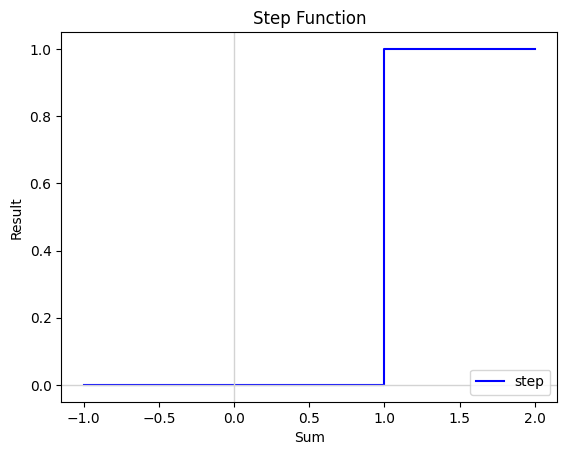

In [21]:
plt.step(inputs, outputs, '-b', label='step')
plt.axhline(0, color='lightgray', lw=1)
plt.axvline(0, color='lightgray', lw=1)
plt.xlabel('Sum')
plt.ylabel('Result')
plt.title('Step Function')
plt.legend(loc='lower right')
plt.show()

## Inputs

**Dimension** ...the number of inputs